In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
import seaborn as sns
from nuforc_csv_to_pandas import scrub

In [2]:
#Read in UFO CSV file as a dataframe
ufo_data = scrub()

In [3]:
ufo_data.head()

,Date_Time,City,State,Shape,Duration,Summary,Posted,Duration_Mins,Year,Month,Day_Of_Month,Day_Of_Week,Timestamp
0,2021-05-19 20:15:00,atlanta,GA,sphere,10 min,Two black UFO over Atlanta one coming close to...,2021-05-20,10.0,2021,5,19,Wednesday,20:15:00
1,2021-05-19 17:25:00,glens falls,NY,triangle,20 minutes,Triangular object over the Hudson River,2021-05-20,20.0,2021,5,19,Wednesday,17:25:00
2,2021-05-19 14:30:00,north haledon,NJ,other,20 mins,I’m no stranger to flying things but yesterday...,2021-05-20,20.0,2021,5,19,Wednesday,14:30:00
3,2021-05-19 10:50:00,clarksburg,MD,triangle,1 min,Triangle ufo,2021-05-20,1.0,2021,5,19,Wednesday,10:50:00
4,2021-05-19 01:00:00,sharon connecticut,CT,light,1 hour,Strange star over northwestern connecticut,2021-05-20,60.0,2021,5,19,Wednesday,01:00:00


In [4]:
#df_shape = DataFrame(data = ufo_data.shape)
count_shape = ufo_data.Shape.value_counts()
print(count_shape)

light        24451
other        15855
circle       12501
triangle     10900
fireball      8611
unknown       8218
sphere        7754
disk          6871
oval          5150
formation     3988
changing      2911
cigar         2858
flash         2094
rectangle     2033
cylinder      1857
diamond       1696
chevron       1397
Name: Shape, dtype: int64


Text(0.5, 1.0, 'Amount of UFO Shapes Viewed')

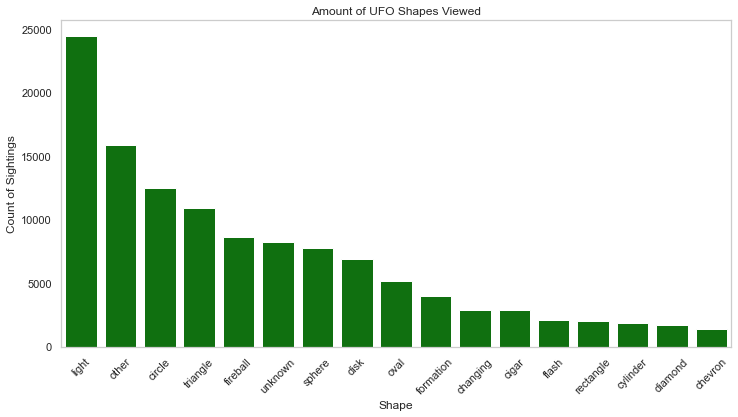

In [48]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (12,6))
count_shape = sns.countplot(x=ufo_data.Shape, order = ufo_data['Shape'].value_counts().index, color = 'green')

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Count of Sightings')
plt.title('Amount of UFO Shapes Viewed')

In [8]:
#table of top 10 shapes and counts

ufo_data['Shape'].value_counts()[:10]

light        24451
other        15855
circle       12501
triangle     10900
fireball      8611
unknown       8218
sphere        7754
disk          6871
oval          5150
formation     3988
Name: Shape, dtype: int64

Shape graph analysis notes:

Light and other were the first most frequent shapes. Other was calculated by taking the original amount of "other" shape values 9188 and assigning any other data values that were not part of the most frequently used top 15 shapes from the original data set. It makes sense that the other data value is the second highest shape given that there were so many shape values that were changed to other for data consistency. It's interesting that light is the highest recorded shape at almost 25,000 sightings of a UFO light. It could be attributed to the UFO's being so distant that it is difficult for viewers to determine a true 'shape' aside from the bright light it produces in the sky. The next most frequently viewed shapes were circle, triangle, and fireball. Because fireball is similar to a light and a circle shape combined, it's fair to say that viewers often either identify a bright circle shape as a UFO or a bright triangle shape as a UFO if they can discern the shape. 

In [9]:
ufo_data['Duration_Mins'].value_counts()[:100]

5.000000      12304
2.000000       9271
1.000000       9204
10.000000      8240
3.000000       7095
              ...  
31.000000        11
1.083333         10
38.000000        10
34.000000         9
100.000000        9
Name: Duration_Mins, Length: 102, dtype: int64

In [10]:
#bin duration data
#show ten bins with updated x, y axis, and labels
#make point that you'll look at the 90% of the data and ignore the upper 10%

#df['quantile_ex_2'] = pd.qcut(df['ext price'], q=10, precision=0)
#ufo_data = ufo_data[ufo_data.Shape.apply(lambda x: type(x) == str)] 
#ufo_data['Duration'] = ufo_data[ufo_data.Duration.apply(lambda x: type(x) == float)]
#labels = ['0 - 0.5', '05 - x', 'x - x', 'x - y']
ufo_data['duration_bins'] = pd.qcut(ufo_data['Duration_Mins'], q= 10, precision = 0)
#ufo_data['duration_bins']

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

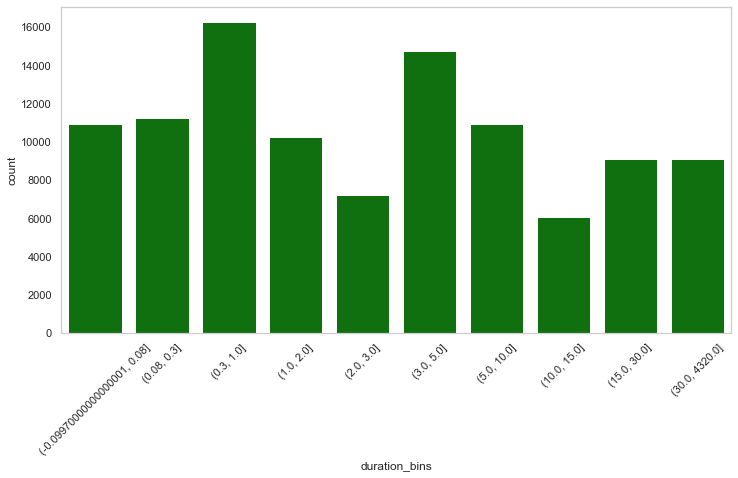

In [47]:


sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (12,6))
count_duration = sns.countplot(x=ufo_data.duration_bins, color = 'green')

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

In [58]:
?pd.qcut

Text(0.5, 1.0, 'Length of UFO Sighting Duration')

<Figure size 864x432 with 0 Axes>

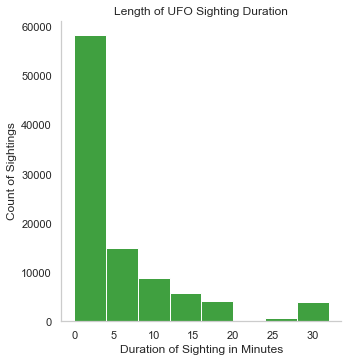

In [46]:
#line graph of duration quantities zoomed in to first 9/10 bins 0-30 mins
#pull the dur min data for only first 9 buckets i.e. 30 min or less duration

dur_mins_group = ufo_data[ufo_data.Duration_Mins <= 30]
#line_duration = sns.countplot(x = dur_mins_group.Duration_Mins)
# line_duration.set_ylim(0,30000)
#dur_mins_group.Duration_Mins.sort_values().head()
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (12,6))
dis_duration = sns.displot(x = dur_mins_group.Duration_Mins, binwidth = 4, color = 'green')
plt.xlabel('Duration of Sighting in Minutes')
plt.ylabel('Count of Sightings')
plt.title('Length of UFO Sighting Duration')

The analysis of the duration of UFO sightings determined that even though the average duration of sightings is 15 minutes, 75% of sightings last 10 minutes or less. From the visuals, you can determine that most sightings last five or less minutes, which means that the UFOs recorded do not normally stay in the same place for long time to hover in one spot. Additionally, the top 10% of sightings recorded last anywhere from over 30 minutes to 3 days. This means that if someone were to try to spot a UFO, they would need to ensure they are keeping a close eye on the sky because the UFO will not be there for a long period of time. 

In [30]:
#average duration with 25% and 75%

ufo_data['Duration_Mins'].describe()

count    105806.000000
mean         15.163968
std          71.106655
min           0.000333
25%           0.500000
50%           3.000000
75%          10.000000
max        4320.000000
Name: Duration_Mins, dtype: float64

In [31]:
dur_mins_group['duration_bins_2'] = pd.qcut(dur_mins_group['Duration_Mins'], q= 3, precision = 0)

<ipython-input-31-30d74e01b086>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dur_mins_group['duration_bins_2'] = pd.qcut(dur_mins_group['Duration_Mins'], q= 3, precision = 0)


In [32]:
dur_mins_group['duration_bins_2'].value_counts()

(-1.0, 1.0]    38403
(1.0, 5.0]     32224
(5.0, 30.0]    26086
Name: duration_bins_2, dtype: int64

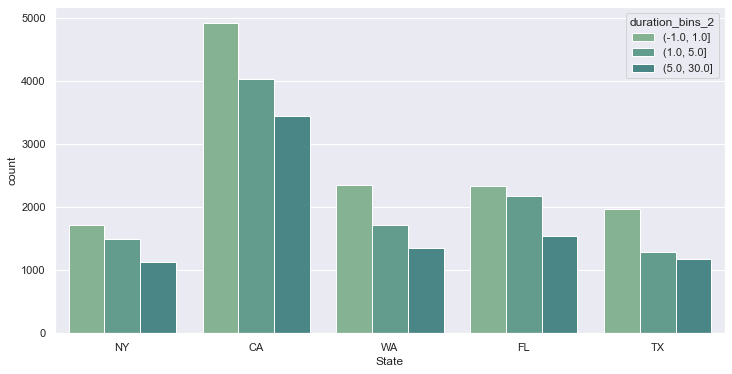

In [33]:
#Show states with top 5 amount of sightings and see dist of duration
#dur_state_cat = sns.catplot(data=dur_mins_group, kind="bar", x=dur_mins_group.State.value_counts(), hue="duration_bins_2",ci="sd", alpha=.6, height=6)
#determine top five states with most UFO sightings
dur_mins_group.State.value_counts()

#create a new data frame filtered to only the top five states 
dur_mins_group_state = dur_mins_group[dur_mins_group.State.isin( ["CA",'FL','WA','TX','NY'])]


Similar distributions of time data based on state
Try this out for shape and date data as well

Text(0.5, 1.0, 'Durations per State')

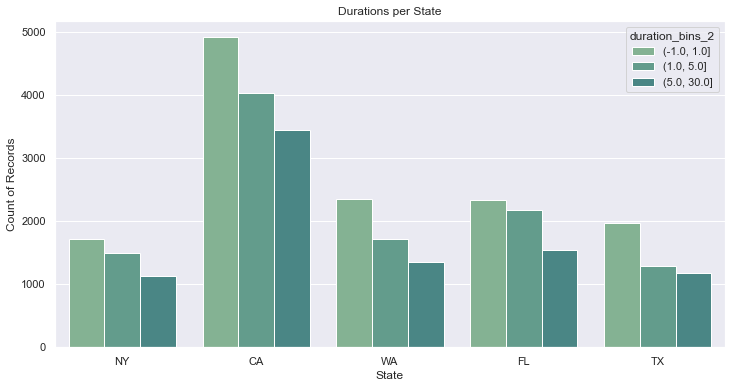

In [36]:
plt.figure(figsize = (12,6))
dur_state_count = sns.countplot(x = dur_mins_group_state.State, hue = dur_mins_group_state.duration_bins_2)
plt.ylabel('Count of Records')
plt.title('Durations per State')